# Imports & reading

In [1]:
# new autosklearn fun - must have swig3, pyrfr >7,<9
# https://github.com/automl/auto-sklearn/issues/1025

In [2]:
import pandas as pd
# import pandas_profiling as pdp
import numpy as np


In [3]:
df_train = pd.read_csv('train.csv')
display("train size", df_train.shape)
print('\n\nView training data')

display(df_train)
display(df_train.dtypes)

'train size'

(2666, 18)



View training data


,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,56.5,0.26,322.2,194.3,126,1,0,0,1,3,2,4,Male,False,True,MS,510,402-5509
1,84.0,0.46,279.1,170.9,92,0,0,0,1,2,2,3,Male,False,False,OH,510,370-3021
2,96.0,0.00,294.7,306,96,1,1,0,0,2,3,3,Female,True,False,MI,415,373-1448
3,62.0,0.00,255.4,185.6,100,2,0,0,0,2,2,3,Male,False,False,VT,510,403-1769
4,45.0,0.28,300.6,197.9,154,0,0,0,1,3,2,5,Male,False,True,WV,408,405-9384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,83.0,0.29,276.1,193.5,97,2,0,0,1,2,2,3,Male,True,True,ID,510,399-7029
2662,71.0,0.00,154.7,230.1,135,5,1,0,0,1,3,4,Male,False,False,OK,408,345-1524
2663,82.0,0.00,221.9,92.2,113,3,0,0,0,2,2,4,Male,False,True,MA,415,419-2767
2664,79.5,0.42,279.3,158.2,113,0,0,0,1,2,2,4,Male,False,True,VT,415,403-5552


last_purchase      float64
max_discount       float64
shoe_spend         float64
apparell_spend      object
acc_spend            int64
custserv_calls       int64
churn                int64
acc_purchasers       int64
promo_purchaser      int64
shoe_orders          int64
apparel_orders       int64
acc_orders           int64
gender              object
ecommShopper          bool
bhShopper             bool
state               object
area_code            int64
phone               object
dtype: object

# EDA

In [4]:
# profile = pdp.ProfileReport(df_train, title='Pandas Profiling Report', explorative=True)
# # profile.to_file("your_report.html")
# profile.to_notebook_iframe()

# clean data

In [5]:
# phone isn't useful
df_train.drop(columns='phone', inplace=True)

In [6]:
# profiling revealed that `apparell_spend` has 1 non-numeric character
'''Most occurring categories
Value	Count	Frequency (%)
Decimal Number	10175	81.0%
Other Punctuation	2382	 19.0%
Lowercase Letter	1	 < 0.1%'''

# df_train.apparell_spend[df_train['apparell_spend'].apply(lambda x: x.isnumeric())]
# pd.to_numeric(df_train.apparell_spend, errors='raise')
# ValueError: Unable to parse string "a" at position 707
df_train.apparell_spend = pd.to_numeric(df_train.apparell_spend, errors='coerce')
df_train.apparell_spend[707] = df_train.apparell_spend.mean()
df_train.iloc[[707]]

<ipython-input-6-372931c8448f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.apparell_spend[707] = df_train.apparell_spend.mean()


,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code
707,66.0,0.0,314.8,171.388105,116,0,1,0,0,3,2,4,Female,False,True,CA,408


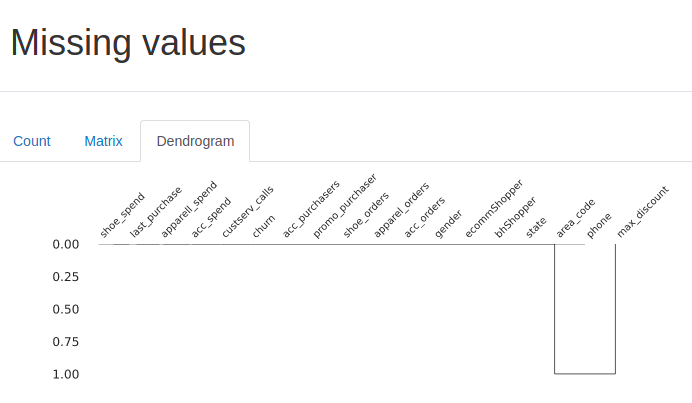

In [7]:
# from profiling - columns with missing values 
from IPython.display import Image
Image(filename='missing_values.png') 

In [8]:
df_train['area_code'] = df_train['area_code'].fillna(df_train['area_code'].mode())
df_train['max_discount'] = df_train['max_discount'].fillna(df_train['max_discount'].mean())


In [9]:
# dummies_train = df_train.dropna()
dummies_train = pd.get_dummies(df_train, columns=['gender','ecommShopper','bhShopper',
                                                       'state','area_code'])

In [10]:
# originally dropped the row
# df_train.drop([707],inplace=True)
# df_train.reset_index()
# df_train.apparell_spend = pd.to_numeric(df_train.apparell_spend, errors='raise')
# df_train.dtypes

In [11]:
dummies_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_purchase       2666 non-null   float64
 1   max_discount        2666 non-null   float64
 2   shoe_spend          2666 non-null   float64
 3   apparell_spend      2666 non-null   float64
 4   acc_spend           2666 non-null   int64  
 5   custserv_calls      2666 non-null   int64  
 6   churn               2666 non-null   int64  
 7   acc_purchasers      2666 non-null   int64  
 8   promo_purchaser     2666 non-null   int64  
 9   shoe_orders         2666 non-null   int64  
 10  apparel_orders      2666 non-null   int64  
 11  acc_orders          2666 non-null   int64  
 12  gender_Female       2666 non-null   uint8  
 13  gender_Male         2666 non-null   uint8  
 14  ecommShopper_False  2666 non-null   uint8  
 15  ecommShopper_True   2666 non-null   uint8  
 16  bhShop

In [12]:
trainy = np.array(dummies_train['churn'], dtype='int')
dummies_train.drop(columns=['churn'], inplace=True)
trainX=dummies_train.values

# dummies_test = pd.get_dummies(df_test, columns=['profession','marital','schooling','default',
#                                                   'housing','loan','contact','month','day_of_week','poutcome'])
# dummies_test = dummies_test.drop(['Unnamed: 0'], axis=1)
# testX = dummies_test.values

In [13]:
# def Diff(li1, li2): 
#     return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

# display("column diff: ", Diff(dummies_train.columns, dummies_test.columns))
# display(trainX.shape)
# display(trainy.shape)
# # display(testX.shape)

# test model

In [ ]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
import autosklearn.classification

X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, test_size=0.25, random_state=42)
cls = autosklearn.classification.AutoSklearnClassifier(metric=autosklearn.metrics.f1, memory_limit=1024)
cls.fit(trainX, trainy)
y_hat = cls.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
# Accuracy score 0.9415538132573058
print("Balanced Accuracy score", sklearn.metrics.balanced_accuracy_score(y_test, y_hat))
# Balanced Accuracy score 0.8896719770433406

/home/zaphodnothingth/miniconda3/envs/automl/lib/python3.8/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels=['yes','no'])
disp = disp.plot(values_format='.0f')

In [ ]:
print(cls.sprint_statistics())

In [ ]:
cls.show_models()

In [ ]:
cls.cv_results_

In [ ]:
import PipelineProfiler
profiler_data = PipelineProfiler.import_autosklearn(cls)
PipelineProfiler.plot_pipeline_matrix(profiler_data)


# Retrain model using full set

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(metric=autosklearn.metrics.f1, n_jobs=4, ml_memory_limit=6144)
automl.fit(trainX, trainy)

In [ ]:
predictions = automl.predict(testX)

In [ ]:
predictions

In [ ]:
df_test['responded'] = predictions

In [ ]:
df_test.to_csv('test_results_astevens.csv')